In [1]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Image

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score 

pd.set_option('display.notebook_repr_html', False)

import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use('seaborn-white')

L:\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
boston_df = pd.read_csv('Boston.csv')
boston_df.head()

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

    black  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  

In [3]:
X = boston_df.drop('medv', axis=1)
y = boston_df.medv

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=0)

L:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [4]:
print (X_train[:5])
print (X_test[:5])
print (y_train[:5])
print (y_test[:5])

        crim   zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
232  0.57529  0.0   6.20     0  0.507  8.337  73.3  3.8384    8  307     17.4   
133  0.32982  0.0  21.89     0  0.624  5.822  95.4  2.4699    4  437     21.2   
33   1.15172  0.0   8.14     0  0.538  5.701  95.0  3.7872    4  307     21.0   
482  5.73116  0.0  18.10     0  0.532  7.061  77.0  3.4106   24  666     20.2   
44   0.12269  0.0   6.91     0  0.448  6.069  40.0  5.7209    3  233     17.9   

      black  lstat  
232  385.91   2.47  
133  388.69  15.03  
33   358.77  18.35  
482  395.28   7.01  
44   389.39   9.55  
         crim   zn  indus  chas    nox     rm    age     dis  rad  tax  \
329   0.06724  0.0   3.24     0  0.460  6.333   17.2  5.2146    4  430   
371   9.23230  0.0  18.10     0  0.631  6.216  100.0  1.1691   24  666   
219   0.11425  0.0  13.89     1  0.550  6.373   92.4  3.3633    5  276   
403  24.80170  0.0  18.10     0  0.693  5.349   96.0  1.7028   24  666   
78    0.05646  0.

In [5]:
regr2 = DecisionTreeRegressor()
regr2.fit(X_train, y_train)
pred = regr2.predict(X_test)

In [6]:
print (pred[:5])
print (y_test[:5])

[25.3 14.5 22.3 12.1 20.8]
329    22.6
371    50.0
219    23.0
403     8.3
78     21.2
Name: medv, dtype: float64


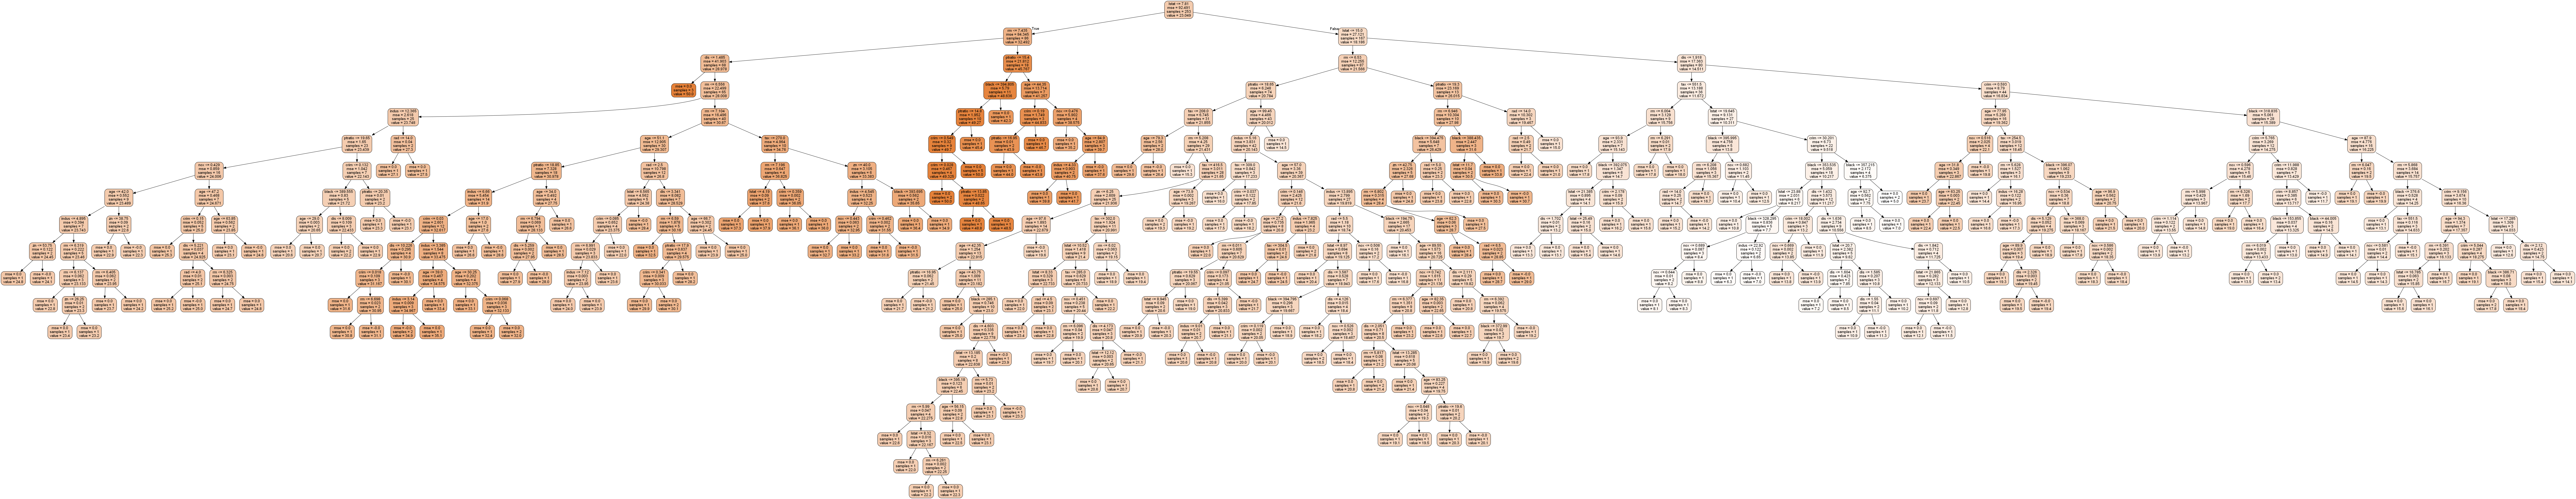

In [7]:
dot_data = export_graphviz(regr2,
                                feature_names=X.columns,
                                out_file='tree.dot',
                                filled=True,
                                rounded=True)

!dot -Tpng tree.dot > tree.png

from IPython.display import Image
Image(filename='tree.png')

In [8]:
mseDTFull = mean_squared_error(y_test, pred)
R_SquaredDTFull = r2_score(y_test,pred)

print (mseDTFull)
print (R_SquaredDTFull)

24.92588932806324
0.6712284179062611


In [9]:
regr2 = DecisionTreeRegressor(max_depth = 3)
regr2.fit(X_train, y_train)
pred = regr2.predict(X_test)

In [10]:
help(DecisionTreeRegressor)

Help on class DecisionTreeRegressor in module sklearn.tree.tree:

class DecisionTreeRegressor(BaseDecisionTree, sklearn.base.RegressorMixin)
 |  DecisionTreeRegressor(criterion='mse', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, presort=False)
 |  
 |  A decision tree regressor.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : string, optional (default="mse")
 |      The function to measure the quality of a split. Supported criteria
 |      are "mse" for the mean squared error, which is equal to variance
 |      reduction as feature selection criterion and minimizes the L2 loss
 |      using the mean of each terminal node, "friedman_mse", which uses mean
 |      squared error with Friedman's improvement score for potential splits,
 |      and "mae" for the mean abso

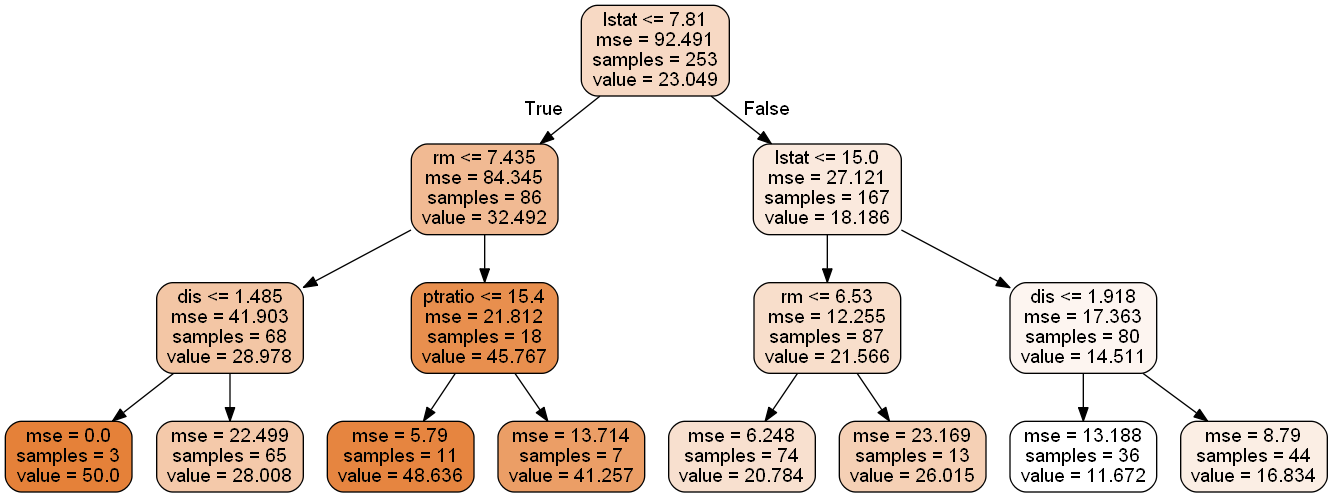

In [11]:
dot_data = export_graphviz(regr2,
                                feature_names=X.columns,
                                out_file='tree.dot',
                                filled=True,
                                rounded=True)

!dot -Tpng tree.dot > tree.png

from IPython.display import Image
Image(filename='tree.png')

In [12]:
mseDT = mean_squared_error(y_test, pred)
R_SquaredDT = r2_score(y_test,pred)

print (mseDT)
print (R_SquaredDT)

26.02323085009744
0.6567545227706459


# Random Forests

In [13]:
X.shape

(506, 13)

# Random forests: using 13 features

In [14]:
regr1 = RandomForestRegressor(max_features=13, random_state=1)
regr1.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=13, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=1,
           verbose=0, warm_start=False)

In [15]:
pred = regr1.predict(X_test)

In [16]:
mseRF13 = mean_squared_error(y_test, pred)
R_SquaredRF13 = r2_score(y_test,pred)

print (mseRF13)
print (R_SquaredRF13)

18.301366007905138
0.7586056418006623


# Random forests: using 6 features

In [17]:
# Random forests: using 6 features
regr2 = RandomForestRegressor(max_features=6, random_state=1)
regr2.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=1,
           verbose=0, warm_start=False)

In [18]:
pred = regr2.predict(X_test)

In [19]:
mseRF6 = mean_squared_error(y_test, pred)
R_SquaredRF6 = r2_score(y_test,pred)

print (mseRF6)
print (R_SquaredRF6)

16.469374703557314
0.7827695410936872


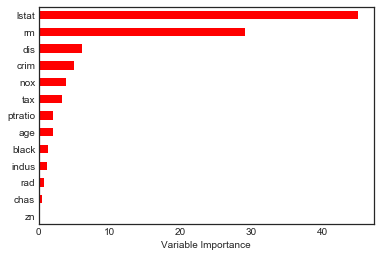

In [20]:
Importance = pd.DataFrame({'Importance':regr2.feature_importances_*100}, index=X.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

# Building A Linear Regression on Top Two Important Variables

In [21]:
X_train = X_train[['lstat','rm']]
X_test = X_test[['lstat','rm']]

In [22]:
from sklearn.linear_model import LinearRegression
regressoragent = LinearRegression()
regressoragent.fit (X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
pred = regressoragent.predict(X_test)

In [24]:
mseLR = mean_squared_error(y_test, pred)
R_SquaredLR = r2_score(y_test,pred)

print (mseLR)
print (R_SquaredLR)

31.049921198021423
0.5904526582060123


# Building A Decision Tree Regression on Top Two Important Variables

In [25]:
regr2 = DecisionTreeRegressor(max_depth=3)
regr2.fit(X_train, y_train)
pred = regr2.predict(X_test)

mseDTwT2 = mean_squared_error(y_test, pred)
R_SquaredDTwT2 = r2_score(y_test,pred)

print (mseDTwT2)
print (R_SquaredDTwT2)

26.340957343766433
0.6525637217676484


# Building A Random Forest on Top Two Important Variables

In [26]:
regr1 = RandomForestRegressor(random_state=1)
regr1.fit(X_train, y_train)

pred = regr1.predict(X_test)

mseRFwT2 = mean_squared_error(y_test, pred)
R_SquaredRFwT2 = r2_score(y_test,pred)

print (mseRFwT2)
print (R_SquaredRFwT2)

24.684328063241107
0.674414602285196


# Comparing all the models

In [27]:
from prettytable import PrettyTable
t = PrettyTable(['Model', 'RMSE', 'R-Squared'])
t.add_row(['DTFull', mseDTFull, R_SquaredDTFull])
t.add_row(['DT', mseDT, R_SquaredDT])
t.add_row(['RF w 13 Features', mseRF13, R_SquaredRF13])
t.add_row(['RF w 6 Features', mseRF6, R_SquaredRF6])
t.add_row(['LR with Top 2 Variables', mseLR, R_SquaredLR])
t.add_row(['DT with Top 2 Variables', mseDTwT2, R_SquaredDTwT2])
t.add_row(['RF with Top 2 Variables', mseRFwT2, R_SquaredRFwT2])

print (t)


+-------------------------+--------------------+--------------------+
|          Model          |        RMSE        |     R-Squared      |
+-------------------------+--------------------+--------------------+
|          DTFull         | 24.92588932806324  | 0.6712284179062611 |
|            DT           | 26.02323085009744  | 0.6567545227706459 |
|     RF w 13 Features    | 18.301366007905138 | 0.7586056418006623 |
|     RF w 6 Features     | 16.469374703557314 | 0.7827695410936872 |
| LR with Top 2 Variables | 31.049921198021423 | 0.5904526582060123 |
| DT with Top 2 Variables | 26.340957343766433 | 0.6525637217676484 |
| RF with Top 2 Variables | 24.684328063241107 | 0.674414602285196  |
+-------------------------+--------------------+--------------------+
